In [27]:
from sklearn.datasets import make_regression

In [28]:
X, y = make_regression(n_samples=100000, n_features=50, noise=0.2, random_state=42)

In [30]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
# X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 80000
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model

In [31]:
model = Sequential()
model.add(Dense(25, input_dim=50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer='adam')
# fit model

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 26        
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model

In [34]:
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training

Train: 0.000, Test: 0.000


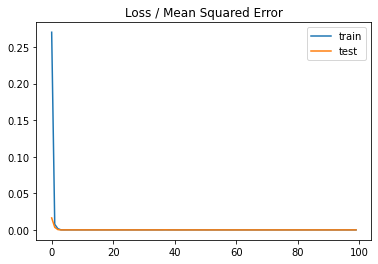

In [35]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()